<a href="https://colab.research.google.com/github/Sanjaygandhari/Autism_ML/blob/main/Autism_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
from IPython.display import display
from imblearn.over_sampling import SMOTE

%matplotlib inline

asd_data =pd.read_csv('/content/Child_dataset.csv')
display(asd_data)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6.0,m,Others,no,no,5,4-11 years,Parent,No
1,1,1,0,0,1,1,0,1,0,0,6.0,m,Middle Eastern,no,no,5,4-11 years,Parent,No
2,1,1,0,0,0,1,1,1,0,0,6.0,m,NaN,no,no,5,4-11 years,NaN,No
3,0,1,0,0,1,1,0,0,0,1,5.0,f,NaN,yes,no,4,4-11 years,NaN,No
4,1,1,1,1,1,1,1,1,1,1,5.0,m,Others,yes,no,10,4-11 years,Parent,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,0,0,0,0,0,0,0,0,0,1,2.0,f,White European,no,yes,1,1-3 years,family member,No
1342,0,0,1,1,1,0,1,0,1,0,1.0,m,black,yes,no,5,1-3 years,family member,Yes
1343,1,0,1,1,1,1,1,1,1,1,1.5,m,middle eastern,yes,no,9,1-3 years,family member,Yes
1344,1,0,0,0,0,0,0,1,0,1,1.6,m,White European,no,yes,3,1-3 years,family member,No


In [36]:
# total no of rows
n_record = len(asd_data.index)

# records of children with ASD
n_asd_yes = len(asd_data[asd_data['Class/ASD'] == 'Yes'])

# records of children without ASD
n_asd_no = len(asd_data[asd_data['Class/ASD'] == 'No'])

print("Total number of records: {}".format(n_record))
print("Children diagonised with ASD: {}".format(n_asd_yes))
print("Children not diagonised with ASD: {}".format(n_asd_no))

Total number of records: 1346
Children diagonised with ASD: 869
Children not diagonised with ASD: 477


In [37]:
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1342.000000,1346.000000
mean,0.578752,0.467311,0.475483,0.520802,0.572065,0.606241,0.640416,0.467311,0.490342,0.616642,3.187109,5.435364
std,0.493943,0.499116,0.499584,0.499753,0.494963,0.488764,0.480057,0.499116,0.500093,0.486385,2.071037,2.815369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.800000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [38]:
#Removing rows with null values
asd_data.dropna(inplace=True)# inplace removes the rows from orginal dataset
asd_data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6.0,m,Others,no,no,5,4-11 years,Parent,No
1,1,1,0,0,1,1,0,1,0,0,6.0,m,Middle Eastern,no,no,5,4-11 years,Parent,No
4,1,1,1,1,1,1,1,1,1,1,5.0,m,Others,yes,no,10,4-11 years,Parent,Yes
6,1,0,1,1,1,1,0,1,0,1,5.0,m,White-European,no,no,7,4-11 years,Parent,Yes
7,1,1,1,1,1,1,1,1,0,0,5.0,f,Middle Eastern,no,no,8,4-11 years,Parent,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,0,0,0,0,0,0,0,0,0,1,2.0,f,White European,no,yes,1,1-3 years,family member,No
1342,0,0,1,1,1,0,1,0,1,0,1.0,m,black,yes,no,5,1-3 years,family member,Yes
1343,1,0,1,1,1,1,1,1,1,1,1.5,m,middle eastern,yes,no,9,1-3 years,family member,Yes
1344,1,0,0,0,0,0,0,1,0,1,1.6,m,White European,no,yes,3,1-3 years,family member,No


In [39]:
# Split the data into features and target label
asd_target_raw = asd_data['Class/ASD']
asd_features_raw = asd_data[['age', 'gender', 'jaundice', 'autism',
'relation', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score',
'A9_Score','A10_Score']]

In [40]:
# Split the data into features and target label
asd_target_raw = asd_data['Class/ASD']
asd_features_raw = asd_data[['age', 'gender', 'jaundice', 'autism',
'relation', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score',
'A9_Score','A10_Score']]

In [41]:
#Applying Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age']

features_minmax_transform = pd.DataFrame(data = asd_features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(asd_features_raw[numerical])

display(features_minmax_transform)

,age,gender,jaundice,autism,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.50,m,no,no,Parent,1,1,0,0,1,1,0,1,0,0
1,0.50,m,no,no,Parent,1,1,0,0,1,1,0,1,0,0
4,0.40,m,yes,no,Parent,1,1,1,1,1,1,1,1,1,1
6,0.40,m,no,no,Parent,1,0,1,1,1,1,0,1,0,1
7,0.40,f,no,no,Parent,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,0.10,f,no,yes,family member,0,0,0,0,0,0,0,0,0,1
1342,0.00,m,yes,no,family member,0,0,1,1,1,0,1,0,1,0
1343,0.05,m,yes,no,family member,1,0,1,1,1,1,1,1,1,1
1344,0.06,m,no,yes,family member,1,0,0,0,0,0,0,1,0,1


In [42]:
# Applying one hot encoding to convert categorical attributes to numeric attributes
features_final = pd.get_dummies(features_minmax_transform)
display(features_final)

asd_classes = asd_target_raw.apply(lambda x: 1 if x == 'Yes' else 0)

# Printing the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
print(encoded)

,age,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,jaundice_no,jaundice_yes,autism_no,autism_yes,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self,relation_family member
0,0.50,1,1,0,0,1,1,0,1,0,...,True,False,True,False,False,False,True,False,False,False
1,0.50,1,1,0,0,1,1,0,1,0,...,True,False,True,False,False,False,True,False,False,False
4,0.40,1,1,1,1,1,1,1,1,1,...,False,True,True,False,False,False,True,False,False,False
6,0.40,1,0,1,1,1,1,0,1,0,...,True,False,True,False,False,False,True,False,False,False
7,0.40,1,1,1,1,1,1,1,1,0,...,True,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,0.10,0,0,0,0,0,0,0,0,0,...,True,False,False,True,False,False,False,False,False,True
1342,0.00,0,0,1,1,1,0,1,0,1,...,False,True,True,False,False,False,False,False,False,True
1343,0.05,1,0,1,1,1,1,1,1,1,...,False,True,True,False,False,False,False,False,False,True
1344,0.06,1,0,0,0,0,0,0,1,0,...,True,False,False,True,False,False,False,False,False,True


23 total features after one-hot encoding.
['age', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'jaundice_no', 'jaundice_yes', 'autism_no', 'autism_yes', 'relation_Health care professional', 'relation_Others', 'relation_Parent', 'relation_Relative', 'relation_Self', 'relation_family member']


Text(0, 0.5, 'Frequency')

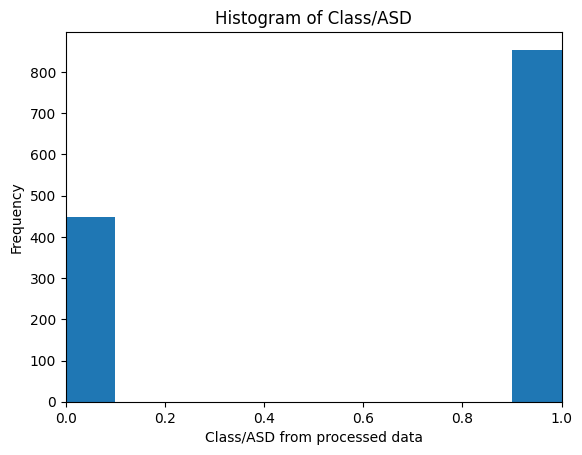

In [43]:
# histogram of Class/ASD
from matplotlib import pyplot as plt

# 8 bins
plt.hist(asd_classes)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

In [44]:
from sklearn.model_selection import train_test_split
from collections import Counter
np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)

smote = SMOTE(random_state=27)
smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)

print("Before sampling class distribution:-", Counter(y_train))
print("After sampling class distribution:-", Counter(smote_y_train))

print("Training Sample before SMOTE", len(X_train.index))
print("Training Sample after SMOTE", len(smote_X_train.index))

print("Training set has {} samples.".format(smote_X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Before sampling class distribution:- Counter({1: 683, 0: 358})
After sampling class distribution:- Counter({1: 683, 0: 683})
Training Sample before SMOTE 1041
Training Sample after SMOTE 1366
Training set has 1366 samples.
Testing set has 261 samples.


In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Train the model on the training data
gb_model.fit(smote_X_train, smote_y_train)

# Predict on the test data
y_pred = gb_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# You can add more evaluations like confusion matrix or classification report
print(metrics.classification_report(y_test, y_pred))


Model Accuracy: 96.55%
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        90
           1       0.97      0.98      0.97       171

    accuracy                           0.97       261
   macro avg       0.97      0.96      0.96       261
weighted avg       0.97      0.97      0.97       261



In [46]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Confusion Matrix: \n{cm}")


Precision: 0.966
Recall: 0.982
Confusion Matrix: 
[[ 84   6]
 [  3 168]]


In [47]:
#Decision tree without cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

d_tree = DecisionTreeClassifier()

#training the model
d_tree.fit(smote_X_train,smote_y_train)

DecisionTreeClassifier()

In [48]:
#testing the model
prediction = d_tree.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, prediction)
print("Confusion Matrix:-")
print(confusion_matrix)

Confusion Matrix:-
[[ 76  14]
 [ 13 158]]


In [49]:
#ML_DEPLOY

In [50]:
import pickle
with open('gradientboosting_model_pickle.pkl', 'wb') as file:
   pickle.dump(gb_model,file)

In [51]:
!pip install streamlit


In [52]:
import streamlit as st
import pickle
import numpy as np

In [53]:
model=pickle.load(open('gradientboosting_model_pickle.pkl','rb'))

In [54]:
def predict_autism (q1,q2,q3, q4, q5, q6, q7, q8, q9, q10, age, gender, jaundice, family_asd, relation):
  input=np.array([[q1,q2, q3, q4, q5, q6, q7, q8, q9, q10, age, gender, jaundice, family_asd, relation]]).astype(np.int64())
  prediction=model.predict_proba(input)
  pred='{0:.{1}f}'.format(prediction [0] [0], 2)
  return float(pred)

In [55]:
st.set_page_config(page_title="ASD PREDICTOR", page_icon="🩺")
st.title("MINI PROJECT GROUP:H5_CSE")
html_temp="""
<div style="background-color:#025246; padding:10px">
<h2 style="color: white;text-align:center; ">ASD Prediction ML. App</h2>
<p style="color: white; text-align:center;">Note: This Web App uses Gradient Boosting Model to predict the probability of having ASD</p>
</div>"""

2025-02-08 09:55:42.861 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-08 09:55:42.872 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-08 09:55:42.880 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [56]:
%%writefile your_script.py
import streamlit as st
import numpy as np
import pickle  # Assuming you have the model saved as a pickle file

# Load the pre-trained model (assuming it's saved as 'model.pkl')
with open('gradientboosting_model_pickle.pkl', 'rb') as file:
    gb_model = pickle.load(file)

# Define function to make prediction
def predict_autism(q1, q2, q3, q4, q5, q6, q7, q8, q9, q10, age, gender, jaundice, family_asd, relation):
    # Map gender, jaundice, family_asd, and relation to the expected numerical inputs
    gender_m = 1 if gender == 'Male' else 0
    jaundice_yes = 1 if jaundice == 'Yes' else 0
    autism_yes = 1 if family_asd == 'Yes' else 0

    # Map relations
    relation_mapping = {
        "Health care professional": [1, 0, 0, 0, 0, 0],
        "Others": [0, 1, 0, 0, 0, 0],
        "Parent": [0, 0, 1, 0, 0, 0],
        "Relative": [0, 0, 0, 1, 0, 0],
        "Self": [0, 0, 0, 0, 1, 0],
        "Family member": [0, 0, 0, 0, 0, 1],
    }
    relation_features = relation_mapping.get(relation, [0, 0, 0, 0, 0, 0])

    # Combine all features into a single array for prediction
    features = np.array([age, q1, q2, q3, q4, q5, q6, q7, q8, q9, q10,
                         gender_m, 1 - gender_m, jaundice_yes, 1 - jaundice_yes,
                         autism_yes, 1 - autism_yes] + relation_features)

    # Predict probability
    probability = gb_model.predict_proba([features])[0][1]
    return probability

# Input fields with questions displayed
q1 = st.number_input('Q1: I often notice small sounds when others do not? (Yes=1, No=0)', min_value=0, max_value=1, step=1)
q2 = st.number_input('Q2: I usually concentrate more on the whole picture, rather than the small details? (Yes=1, No=0)', min_value=0, max_value=1, step=1)
q3 = st.number_input('Q3: I find it easy to do more than one thing at a time? (Yes=1, No=0)', min_value=0, max_value=1, step=1)
q4 = st.number_input('Q4: If there is an interruption, i can switch back to what i was doing very qucikly? (Yes=1, No=0)', min_value=0, max_value=1, step=1)
q5 = st.number_input('Q5: I find it easy to read between the lines when someone is talking to me? (Yes=1, No=0)', min_value=0, max_value=1, step=1)
q6 = st.number_input('Q6: I know how to tell if someone listening to me is getting bored? (Yes=1, No=0)', min_value=0, max_value=1, step=1)
q7 = st.number_input('Q7: When im reading a story, i find it difficult to work out the characters intentions? (Yes=1, No=0)', min_value=0, max_value=1, step=1)
q8 = st.number_input('Q8: I like to collect info about categories of things? (Yes=1, No=0)', min_value=0, max_value=1, step=1)
q9 = st.number_input('Q9: I find it easy to work out what someone is thinking or feeling just by looking at their face? (Yes=1, No=0)', min_value=0, max_value=1, step=1)
q10 = st.number_input('Q10: I find it difficult to work out on peoples intentions? (Yes=1, No=0)', min_value=0, max_value=1, step=1)
age = st.number_input('Age', min_value=0.0, max_value=100.0, step=0.1)
gender = st.selectbox('Gender', ['Male', 'Female'])
jaundice = st.selectbox('Jaundice (Was the child born with jaundice?)', ['Yes', 'No'])
family_asd = st.selectbox('Family history of ASD', ['Yes', 'No'])
relation = st.selectbox('Relation to the child', [
    "Health care professional", "Others", "Parent", "Relative", "Self", "Family member"
])
# Define HTML for output messages
safe_html = """
<div style="background-color: #F4D03F; padding: 10px;">
<h2 style="color: white;text-align:center;"> You do not have ASD</h2>
</div>
"""
danger_html = """
<div style="background-color: #F08080; padding: 10px;">
<h2 style="color: black; text-align:center;"> You may have ASD!! Please consult a professional Doctor.</h2>
</div>
"""
# Run prediction only if user presses button
if st.button("Predict"):
    # Call the prediction function
    output = predict_autism(q1, q2, q3, q4, q5, q6, q7, q8, q9, q10, age, gender, jaundice, family_asd, relation)
    st.success('The probability of having ASD is {:.2f}'.format(output))
    # Check output value and display the appropriate message
    if output >= 0.5:
        st.markdown(danger_html, unsafe_allow_html=True)
    else:
        st.markdown(safe_html, unsafe_allow_html=True)


Overwriting your_script.py


In [57]:
!pip install pyngrok
from pyngrok import ngrok


In [58]:
!ngrok config add-authtoken 2oWfunKSb64BlMi9vfbG4bwhoxV_6fFseBBX8vsh6GDTibx8c

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [59]:
!pip install scikit-learn


In [64]:
from pyngrok import ngrok
import os

ngrok.set_auth_token("2oWfunKSb64BlMi9vfbG4bwhoxV_6fFseBBX8vsh6GDTibx8c")
# Run Streamlit app in the background
os.system("streamlit run your_script.py &")

# Open a tunnel on port 8501
public_url = ngrok.connect(8501)
print(f"Streamlit app is running at: {public_url}")


Streamlit app is running at: NgrokTunnel: "https://33fd-104-154-224-73.ngrok-free.app" -> "http://localhost:8501"


In [61]:
from pyngrok import ngrok
import os

# ... your other code ...

# List all active ngrok tunnels
tunnels = ngrok.get_tunnels()
# Close existing tunnels
for tunnel in tunnels:
    print(f"Closing tunnel: {tunnel.public_url}")
    ngrok.disconnect(tunnel.public_url)

# Open a tunnel on port 8501
public_url = ngrok.connect(8501)
print(f"Streamlit app is running at: {public_url}")

Closing tunnel: https://625f-104-154-224-73.ngrok-free.app
Streamlit app is running at: NgrokTunnel: "https://1472-104-154-224-73.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!streamlit run your_script.py  # Run Streamlit in the background






  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://104.154.224.73:8502

